In [135]:
import numpy as np
import matplotlib.pyplot as plt
def run(T,initial_pos,initial_bearing,geno,plot_flag):    
#runs a simple agent described by a geno and returns the trajectory    
#the light is at [0 0]    
#input    
#T is the time you want run it for    
#pos initial position    
#bearing initial bearing (degrees) e.g [90; 90]    
#geno genotype e.g [w_ll w_lr w_rl w_rr bl br]    
#plot_flag set to tru to output the figure    
#output a 2-d vector with the x and y coordinates    
#run a simple aget    
#geno = np.array([-1, 0, 0, -.4, 1, 0.5])    
#initial_pos = [1,1]    
#T=100    
#out  = simple_agent.run(T,initial_pos,90,geno,1)    
# Initial setup    
    dt=0.05;    
    R =0.05; #radius    
    b = 45; #(degrees) sensor anglr    
    print(geno[5])    
    #conver geno params    
    w_ll = geno[0]; #left motor to left sensor    
    w_lr = geno[1]; #left motor to right sensor    
    w_rl = geno[2]; #right motor to left sensor    
    w_rr = geno[3]; #right motor to right sensor    
    bl = geno[4];    
    br = geno[5];    
    sl_pos = np.zeros((2,1));    
    sr_pos = np.zeros((2,1));    
    rho=np.zeros((2, 1));    
    sensor_gain = 1;    
    motor_gain =1;    
    vl=0;
    vr=0;    
    #convert to radians    
    initial_bearing = initial_bearing/360*2*np.pi;    
    b=b/360*2*np.pi;    
    pos = np.zeros((2,int(T/dt)));    
    bearing = np.zeros((1,int(T/dt)));    
    pos[:,0] = initial_pos;    
    bearing[:,0] = initial_bearing;    
    for i in range(1, int(T/dt)):        
        vc = (vl+vr)/2;        
        va = (vr-vl)/(2*R);        
        pos[0,i] = pos[0,i-1]+ dt*vc*np.cos(bearing[0,i-1]);
        pos[1,i] = pos[1,i-1]+ dt*vc*np.sin(bearing[0,i-1]);        
        bearing[0,i] = np.mod(bearing[0,i-1] + dt*va,2*np.pi);        
        # Calculate left sensor position        
        sl_pos[0] = pos[0,i] + R*np.cos(bearing[0,i]+b);        
        sl_pos[1] = pos[1,i] + R*np.sin(bearing[0,i]+b);        
        # Calculate right sensor position        
        sr_pos[0] = pos[0,i] + R*np.cos(bearing[0,i]-b);        
        sr_pos[1] = pos[1,i] + R*np.sin(bearing[0,i]-b);        
        # Calculate (square) distance to element        
        dl = np.sqrt((sl_pos[0])**2+(sl_pos[1])**2);        
        dr = np.sqrt((sr_pos[0])**2+(sr_pos[1])**2);        
        #  Calculate local intensity        
        il = sensor_gain/dl;        
        ir = sensor_gain/dr;        
        lm = il*w_ll + ir*w_rl + bl;        
        rm = il*w_lr + ir*w_rr + br;        
        #  Scale by motor gains        
        vl =motor_gain*lm;        
        vr =motor_gain*rm;    
    if plot_flag==1:        
        plt.plot(pos[0,:],pos[1,:])        
        #final postion        
        x=pos[0,int(T/dt)-1];        
        y= pos[1,int(T/dt)-1];        
        f_bearing = bearing[0,int(T/dt)-1];        
        # Calculate left sensor position        
        sl_pos[0] = x + R*np.cos(f_bearing+b);        
        sl_pos[1] = y + R*np.sin(f_bearing+b);        
        # Calculate left sensor position        
        sr_pos[0] = x + R*np.cos(f_bearing-b);        
        sr_pos[1] = y + R*np.sin(f_bearing-b);        
        plt.plot(0,0,marker='.',markersize=30,color='yellow');        
        plt.plot(0,0,marker='o',markersize=10,color='black');    
        # Plot  sensors       
        #        
        plt.plot(sl_pos[0],sl_pos[1],marker='.',markersize=10,color='red');        
        plt.plot(sr_pos[0],sr_pos[1],marker='.',markersize=10,color='red');        
        # Plot body        
        plt.plot( x, y,marker='.',markersize=10,color='blue');        
        plt.plot(x,y,marker='o',markersize=10,color='black');        
        #Plot trajkectory        
        plt.show()
    return pos

0


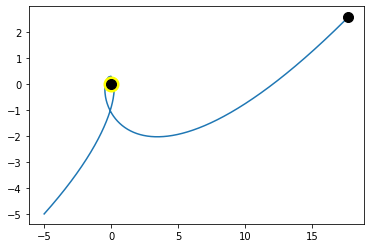

In [130]:
#The code below will create a representation of a aggresor vehicle 
time = 200
initialPosition = [-5, -5]
initialBearing = 30 
genotype = np.array([0, 1, 1, 0, 0, 0])
plotFlag = 1
out = run(time, initialPosition, initialBearing, genotype, plotFlag)


0


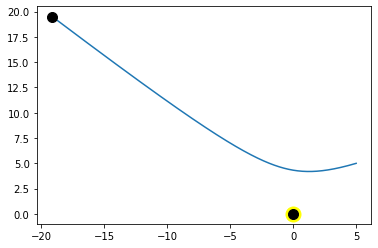

In [132]:
#The code below will create a representation of a coward vehicle 
time = 200
initialPosition = [5, 5]
initialBearing = 200  
genotype = np.array([2, 0, 0, 2, 0, 0])
plotFlag = 1
out = run(time, initialPosition, initialBearing, genotype, plotFlag)

1


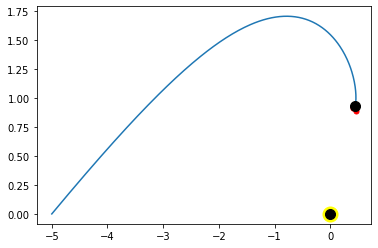

In [134]:
#The code below will create a representation of a lover vehicle 
time = 200
initialPosition = [-5, 0]
initialBearing = 30
genotype = np.array([-1, 0, 0, -1, 1, 1])
plotFlag = 1
out = run(time, initialPosition, initialBearing, genotype, plotFlag)

2


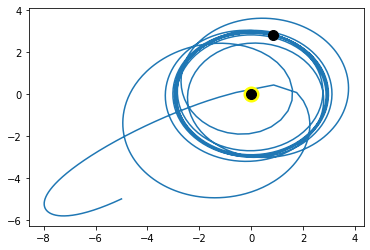

In [136]:
#The code below will create a representation of a explorer vehicle 
time = 200
initialPosition = [-5, -5]
initialBearing = 30 
genotype = np.array([0, -20, -20, 0, 2, 2])
plotFlag = 1
out = run(time, initialPosition, initialBearing, genotype, plotFlag)

In [139]:
#The function below has been modified so the vehicle has one sensor (one eye) connected to the two wheels.
def run2(T,initial_pos,initial_bearing,geno,plot_flag):    
#runs a simple agent described by a geno and returns the trajectory    
#the light is at [0 0]    
#input    
#T is the time you want run it for    
#pos initial position    
#bearing initial bearing (degrees) e.g [90; 90]    
#geno genotype e.g [w_ll w_lr w_rl w_rr bl br]    
#plot_flag set to tru to output the figure    
#output a 2-d vector with the x and y coordinates    
#run a simple aget    
#geno = np.array([-1, 0, 0, -.4, 1, 0.5])    
#initial_pos = [1,1]    
#T=100    
#out  = simple_agent.run(T,initial_pos,90,geno,1)    
# Initial setup    
    dt=0.05;    
    R =0.05; #radius    
    b = 45; #(degrees) sensor anglr       
    #conver geno params      
    bl = geno[0];    
    br = geno[1];        
    sr_pos = np.zeros((2,1));    
    rho=np.zeros((2, 1));    
    sensor_gain = 1;    
    motor_gain = 1;    
    vl=0;
    vr=0;    
    #convert to radians    
    initial_bearing = initial_bearing/360*2*np.pi;    
    b=b/360*2*np.pi;    
    pos = np.zeros((2,int(T/dt)));    
    bearing = np.zeros((1,int(T/dt)));    
    pos[:,0] = initial_pos;    
    bearing[:,0] = initial_bearing;    
    for i in range(1, int(T/dt)):        
        vc = (vl+vr)/2;        
        va = (vr-vl)/(2*R);        
        pos[0,i] = pos[0,i-1]+ dt*vc*np.cos(bearing[0,i-1]);
        pos[1,i] = pos[1,i-1]+ dt*vc*np.sin(bearing[0,i-1]);        
        bearing[0,i] = np.mod(bearing[0,i-1] + dt*va,2*np.pi);             
        # Calculate right sensor position        
        sr_pos[0] = pos[0,i] + R*np.cos(bearing[0,i]-b);        
        sr_pos[1] = pos[1,i] + R*np.sin(bearing[0,i]-b);        
        # Calculate (square) distance to element        
        dl = np.sqrt((sr_pos[0])**2+(sr_pos[1])**2);        
        dr = np.sqrt((sr_pos[0])**2+(sr_pos[1])**2);        
        #  Calculate local intensity               
        ir = sensor_gain/dr;        
        lm = ir + ir + bl;        
        rm = ir + ir + br;    
        #  Scale by motor gains        
        vl =motor_gain*lm;        
        vr =motor_gain*rm;    
    if plot_flag==1:        
        plt.plot(pos[0,:],pos[1,:])        
        #final postion        
        x=pos[0,int(T/dt)-1];        
        y= pos[1,int(T/dt)-1];        
        f_bearing = bearing[0,int(T/dt)-1];               
        # Calculate left sensor position        
        sr_pos[0] = x + R*np.cos(f_bearing-b);        
        sr_pos[1] = y + R*np.sin(f_bearing-b);        
        plt.plot(0,0,marker='.',markersize=30,color='yellow');        
        plt.plot(0,0,marker='o',markersize=10,color='black');    
        # Plot  sensors       
        #         
        plt.plot(sr_pos[0],sr_pos[1],marker='.',markersize=10,color='red');        
        # Plot body        
        plt.plot( x, y,marker='.',markersize=10,color='blue');        
        plt.plot(x,y,marker='o',markersize=10,color='black');   
        plt.savefig("vehicles6.png")
        #Plot trajkectory        
        plt.show()
    return pos

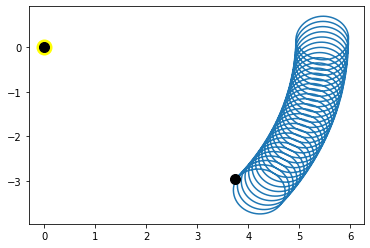

In [138]:
#The code below will create a representation of a one eyed phototaxis over short period of time
time = 200
initialPosition = [5, 0]
initialBearing = 300 
genotype = np.array([0.1, 0.2])
plotFlag = 1
out = run2(time, initialPosition, initialBearing, genotype, plotFlag)

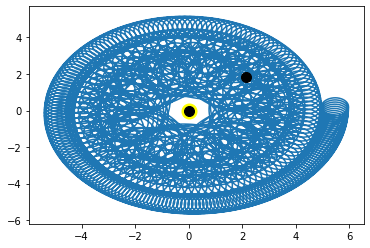

In [140]:
#The code below will create a representation of a one eyed phototaxis over long period of time
time = 3000
initialPosition = [5, 0]
initialBearing = 300 
genotype = np.array([0.1, 0.2])
plotFlag = 1
out = run2(time, initialPosition, initialBearing, genotype, plotFlag)